<a href="https://colab.research.google.com/github/rahulkundelwalll/Soil-CBR-research/blob/main/soillll_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'hhhhhh:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4681506%2F7958664%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240410%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240410T094257Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D15212083aa3e38341c3da2403682bdd4c3938c8f851ad75266500487413f836d545411a668a28c277be91e94ebfd253314a2e3e21efbf90f8f60746080827ae17e9f1fae990f8eaa32daf0c4b9d8edbcb071351c447b5d5780ae44cb7e6f6881a7a456f99c021f70b91bc3722876e4cb7c8a8755e36762a0ab4d7152abc46ff36b1a39575e5b708a75934a2255288c24f030cef96ed113bee926efa578018416963603811483bfa0ef6e6c4f6b2560dd665be385a4afba967ff789b07deae5abfee103e5dfd5070094d7c6770abf906bfc6478edc8d23638a8f212a99e7beb30e51940f3322f4ef700c261aa20a8b02def71bc139c0384ffe0b946e829bfaafc,hellol:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4687752%2F7967357%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240410%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240410T094257Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8a9b9a03ba56d3963263381e829eb17324d3b49e323a6bcdce4efa42ec2ce49b8e21603d46ad20e619ff82ca695d82261105395972f05b48ac193b39e5c738086b7b89d3c3b8f3b661ca4d6b36051ed27584efb63609dbcc69b5f3ada315b6c7894f6f23840f8aa405d31128eee3cf8ee3c7f819390ecf193471c07e34a68ee5c5955a038e5f953641fb18f97799581e412a18a0d7d89c50b98246ae97d4ae15807873a89043ed48e653daeb5570619f6b351720b44ae63cd4e17f0e684691efb4155583b9931f1a8ccfb0047022c61a2d57d6ef35aa705b71afec6e937838ebc85855e5ac38a49675c7c1b37c9a25dda7f972dccd42cd0fbbda358598c370ff'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 21035 bytes downloaded
Downloaded and uncompressed: hhhhhh
[==================================================] 2671 bytes downloaded
Downloaded and uncompressed: hellol
Data source import complete.


In [ ]:

import pandas as pd
df = pd.read_csv('/kaggle/input/hellol/hello.csv')

In [ ]:
df.head()

S. No  \tG (%)  \tS (%)  \tF (%)  \tLL (%)  PL (%)  \tOMC (%)  \
0      1       14       35       51        33    20.0       10.7   
1      2       28       39       33        36    20.0       15.2   
2      3       29       40       31        38    20.0       14.9   
3      4       42       38       20        35    20.0        8.3   
4      5       39       32       29        36    20.0        9.3   

   \tMDD (g/cc)  \tCBR (%)  Unnamed: 9  Unnamed: 10  Unnamed: 11  
0          2.10         24         NaN          NaN          NaN  
1          2.12         26         NaN          NaN          NaN  
2          2.14         27         NaN          NaN          NaN  
3          2.11         29         NaN          NaN          NaN  
4          2.16         28         NaN          NaN          NaN

In [ ]:
# prompt: df = df.sample(frac=1).reset_index(drop=True) apply random state

df = df.sample(frac=1, random_state=32).reset_index(drop=True)


In [ ]:
# import numpy as np

# class PCA:

#     def __init__(self, n_components=None):
#         self.n_components = n_components
#         self.components = None
#         self.mean = None

#     def fit(self, X):
#         # Mean of each feature
#         self.mean = np.mean(X, axis=0)
#         X = X - self.mean
#         # covariance, function needs samples as columns
#         cov = np.cov(X.T)
#         # eigenvalues, eigenvectors
#         eigenvalues, eigenvectors = np.linalg.eig(cov)
#         print("eigenvalues",eigenvalues)
#         # sort eigenvectors
#         eigenvectors = eigenvectors.T
#         idxs = np.argsort(eigenvalues)[::-1]
#         eigenvalues = eigenvalues[idxs]
#         eigenvectors = eigenvectors[idxs]
#         # store first n eigenvectors
#         self.components = eigenvectors[0:self.n_components]
#         plt.figure(1, figsize=(12,8))

#         plt.plot(eigenvalues, linewidth=2)
#         #plot provides insight into the contribution of each principal component (eigenvector) to the total variance in the dataset,
#         #helping in determining the optimal number of principal components to retain for dimensionality reduction.
#         plt.xlabel('Components')
#         plt.ylabel('Explained Variaces')
#         plt.show()

#     def transform(self, X):
#         # project data
#         X = X - self.mean
#         return np.dot(X, self.components.T)

In [ ]:
for i in range(9, 12):
    df.drop('Unnamed: ' + str(i), axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


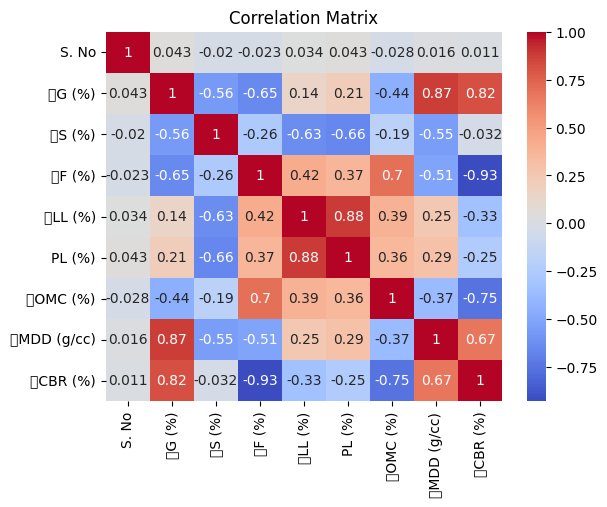

In [ ]:
# prompt: analys the df using corr by seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# prompt: Comparative Analysis
#  apply this also plot

import matplotlib.pyplot as plt
# Create a pairplot
sns.pairplot(df, diag_kind='kde')
plt.title('Pairplot')
plt.show()


In [ ]:
df.head()

S. No  \tG (%)  \tS (%)  \tF (%)  \tLL (%)  PL (%)  \tOMC (%)  \
0     56        0       81       19        23     0.0       6.48   
1     23       39       43       18        28    19.0      10.97   
2     27        0       40       60        36    20.0      13.30   
3     57        0       62       38        32    18.0      15.50   
4    135        0       25       75        50    25.0      24.63   

   \tMDD (g/cc)  \tCBR (%)  
0          2.00         27  
1          2.20         31  
2          2.01         20  
3          2.04         22  
4          1.94         15

In [ ]:
# df.drop('\tMDD (g/cc)', axis=1, inplace=True)
# df.drop('\tLL (%)', axis=1, inplace=True)

In [ ]:
# df.drop('\tMDD (g/cc)', axis=1, inplace=True)

In [ ]:
df.drop('S. No', axis=1, inplace=True)

In [ ]:
df.head()

\tG (%)  \tS (%)  \tF (%)  \tLL (%)  PL (%)  \tOMC (%)  \tMDD (g/cc)  \
0        0       81       19        23     0.0       6.48          2.00   
1       39       43       18        28    19.0      10.97          2.20   
2        0       40       60        36    20.0      13.30          2.01   
3        0       62       38        32    18.0      15.50          2.04   
4        0       25       75        50    25.0      24.63          1.94   

   \tCBR (%)  
0         27  
1         31  
2         20  
3         22  
4         15

In [ ]:
df.describe()

\tG (%)     \tS (%)     \tF (%)      PL (%)   \tOMC (%)   \tCBR (%)
count  149.000000  149.000000  149.000000  149.000000  149.000000  149.000000
mean    22.651007   42.281879   35.208054   19.338926   13.250738   25.416107
std     20.904198   16.423484   17.794349    5.578151    4.647303    4.944422
min      0.000000   14.000000    8.000000    0.000000    5.300000   12.000000
25%      0.000000   31.000000   21.000000   19.000000   10.360000   22.000000
50%     24.000000   39.000000   31.000000   20.000000   12.900000   26.000000
75%     41.000000   50.000000   51.000000   22.000000   15.800000   29.000000
max     65.000000   88.000000   78.000000   27.000000   30.700000   34.000000

In [ ]:
df.corr()['\tCBR (%)'].sort_values(ascending=False)

\tCBR (%)       1.000000
\tG (%)         0.818298
\tMDD (g/cc)    0.672362
S. No           0.011209
\tS (%)        -0.031741
PL (%)         -0.250986
\tLL (%)       -0.326984
\tOMC (%)      -0.753903
\tF (%)        -0.929459
Name: \tCBR (%), dtype: float64

In [ ]:
df.isna().sum()

\tG (%)         0
\tS (%)         0
\tF (%)         0
\tLL (%)        0
PL (%)          0
\tOMC (%)       0
\tMDD (g/cc)    0
\tCBR (%)       0
dtype: int64

In [ ]:
df.head()

S. No  \tG (%)  \tS (%)  \tF (%)  \tLL (%)  PL (%)  \tOMC (%)  \
0      1       14       35       51        33    20.0       10.7   
1      2       28       39       33        36    20.0       15.2   
2      3       29       40       31        38    20.0       14.9   
3      4       42       38       20        35    20.0        8.3   
4      5       39       32       29        36    20.0        9.3   

   \tMDD (g/cc)  \tCBR (%)  
0          2.10         24  
1          2.12         26  
2          2.14         27  
3          2.11         29  
4          2.16         28

In [ ]:
import pandas as pd

# Count the number of zeros in each column
zero_counts = df.eq(0).sum(axis=0)

# Print the results
print(zero_counts)


\tG (%)         39
\tS (%)          0
\tF (%)          0
\tLL (%)         8
PL (%)          10
\tOMC (%)        0
\tMDD (g/cc)     0
\tCBR (%)        0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   	G (%)       149 non-null    int64  
 1   	S (%)       149 non-null    int64  
 2   	F (%)       149 non-null    int64  
 3   	LL (%)      149 non-null    int64  
 4   PL (%)       149 non-null    float64
 5   	OMC (%)     149 non-null    float64
 6   	MDD (g/cc)  149 non-null    float64
 7   	CBR (%)     149 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 9.4 KB


In [ ]:
# Find the columns which contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [ ]:
X = df.drop("\tCBR (%)", axis=1);
y = df["\tCBR (%)"];

In [ ]:
X

\tG (%)  \tS (%)  \tF (%)  \tLL (%)  PL (%)  \tOMC (%)  \tMDD (g/cc)
0          0       81       19        23     0.0       6.48          2.00
1         39       43       18        28    19.0      10.97          2.20
2          0       40       60        36    20.0      13.30          2.01
3          0       62       38        32    18.0      15.50          2.04
4          0       25       75        50    25.0      24.63          1.94
..       ...      ...      ...       ...     ...        ...           ...
144       48       31       31        40    22.0      15.20          2.16
145       57       31       12        32    19.0       5.42          2.21
146       57       16       27        45    23.0       5.30          2.17
147       16       31       53        58    25.0      15.30          2.04
148        3       86       11         0     0.0      10.36          1.91

[149 rows x 7 columns]

In [ ]:
# pca=PCA()
# pca.fit(X)

In [ ]:
# pca = PCA(2)
# pca.fit(X)
# X = pca.transform(X)

# X1=X[:, 0]
# X2=X[:, 1]

# plt.scatter(X1, X2,c=y,alpha=0.8)
# plt.show()

In [ ]:
X

\tG (%)  \tS (%)  \tF (%)  \tLL (%)  PL (%)  \tOMC (%)  \tMDD (g/cc)
0          0       81       19        23     0.0       6.48          2.00
1         39       43       18        28    19.0      10.97          2.20
2          0       40       60        36    20.0      13.30          2.01
3          0       62       38        32    18.0      15.50          2.04
4          0       25       75        50    25.0      24.63          1.94
..       ...      ...      ...       ...     ...        ...           ...
144       48       31       31        40    22.0      15.20          2.16
145       57       31       12        32    19.0       5.42          2.21
146       57       16       27        45    23.0       5.30          2.17
147       16       31       53        58    25.0      15.30          2.04
148        3       86       11         0     0.0      10.36          1.91

[149 rows x 7 columns]

In [ ]:
y.head()

0    27
1    31
2    20
3    22
4    15
Name: \tCBR (%), dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-1.08721711,  2.36543633, -0.91392602, ..., -3.4785988 ,
        -1.46183156, -0.8428591 ],
       [ 0.78472915,  0.04387271, -0.97031317, ..., -0.06096451,
        -0.49242122,  1.27316459],
       [-1.08721711, -0.13940862,  1.39794729, ...,  0.11891098,
         0.01063582, -0.73705792],
       ...,
       [ 1.64870434, -1.60565933, -0.46282879, ...,  0.65853744,
        -1.71659864,  0.95576104],
       [-0.31923916, -0.68925264,  1.00323721, ...,  1.01828842,
         0.44244444, -0.41965436],
       [-0.94322124,  2.67090522, -1.36502325, ..., -3.4785988 ,
        -0.62412284, -1.79506976]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,
                                              y,
                                              test_size=0.2,random_state = 42
                                              )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the results
print("Mean squared error:", mse)
print("R-squared score:", r2)

# Get the weights of the features
weights = model.coef_

# Print the weights
print("Weights:", weights)


Mean squared error: 0.3547593798883072
R-squared score: 0.9848364626757468
Weights: [ 1.80484911 -0.36166728 -2.54830686 -0.77113308  0.07390393 -0.92610557
  0.07795237]


In [ ]:
x_train.shape,y_train.shape

((119, 5), (119,))

In [ ]:
x_val.shape,y_val.shape

((30, 6), (30,))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_val, y_train, y_val are already defined
# Fit quantile regression model
quantiles = [0.1,0.3,0.2,0.4,0.6,0.7,0.8, 0.5, 0.9]  # Example quantiles, you can adjust as needed
quantile_models = {}
for quantile in quantiles:
    model = GradientBoostingRegressor(loss='quantile', alpha=quantile,
                                      n_estimators=80, max_depth=4,
                                      learning_rate=0.1, min_samples_split=2,
                                      random_state=42)
    model.fit(x_train, y_train)
    quantile_models[quantile] = model

# Predict quantiles
quantile_predictions = pd.DataFrame(index=range(len(x_val)), columns=quantiles)
for quantile, model in quantile_models.items():
    quantile_predictions[quantile] = model.predict(x_val)

# Evaluate quantile predictions
def evaluate_quantiles(y_true, quantile_predictions):
    for quantile, preds in quantile_predictions.items():
        mse = mean_squared_error(y_true, preds)
        mae = mean_absolute_error(y_true, preds)
        r2 = r2_score(y_true, preds)
        print(f"Quantile {quantile}:")
        print(f"  Mean Squared Error: {mse:.4f}")
        print(f"  Mean Absolute Error: {mae:.4f}")
        print(f"  R-squared Score: {r2:.4f}")

print("Quantile Regression Metrics:")
evaluate_quantiles(y_val, quantile_predictions)



Quantile Regression Metrics:
Quantile 0.1:
  Mean Squared Error: 2.7472
  Mean Absolute Error: 1.2228
  R-squared Score: 0.8826
Quantile 0.3:
  Mean Squared Error: 1.5629
  Mean Absolute Error: 0.9684
  R-squared Score: 0.9332
Quantile 0.2:
  Mean Squared Error: 1.5242
  Mean Absolute Error: 0.9764
  R-squared Score: 0.9348
Quantile 0.4:
  Mean Squared Error: 0.6573
  Mean Absolute Error: 0.6476
  R-squared Score: 0.9719
Quantile 0.6:
  Mean Squared Error: 0.7078
  Mean Absolute Error: 0.7083
  R-squared Score: 0.9697
Quantile 0.7:
  Mean Squared Error: 0.9389
  Mean Absolute Error: 0.7076
  R-squared Score: 0.9599
Quantile 0.8:
  Mean Squared Error: 1.5462
  Mean Absolute Error: 0.9223
  R-squared Score: 0.9339
Quantile 0.5:
  Mean Squared Error: 0.6775
  Mean Absolute Error: 0.6809
  R-squared Score: 0.9710
Quantile 0.9:
  Mean Squared Error: 7.3711
  Mean Absolute Error: 1.8377
  R-squared Score: 0.6849


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(x_train, y_train)
GBR.score(x_val,y_val)


0.9663966980520031

In [ ]:
# prompt: Tabular Neural Networks apply this model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Assuming X and y are already defined as numpy arrays
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data


# Create the MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(10000,), activation='relu', solver='sgd', max_iter=4000)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print('Test score:', score)


Test score: 0.982996065028045


In [ ]:
import lightgbm as lgb

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(x_train, y_train)
model_lgb.score(x_val,y_val)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

0.9479443029147039

In [ ]:
GBR.score(x_train, y_train)

0.9997479265112772

In [ ]:
# prompt:  BaggingRegresso apply t

from sklearn.ensemble import BaggingRegressor
reg = BaggingRegressor(GBR, n_estimators=20, random_state=0).fit(x_train, y_train)
reg.score(x_val,y_val)


0.9673934368992684

In [ ]:
# prompt: from sklearn.ensemble import BaggingRegressor
# reg = BaggingRegressor(GBR, n_estimators=20, random_state=0).fit(x_train, y_train)
# reg.score(x_val,y_val)
# hyper tune thid

import numpy as np
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100, 150, 200, 250, 500],
              'max_samples': [0.5, 0.7, 0.9, 1.0],
              'max_features': [0.5, 0.7, 0.9, 1.0],
              'bootstrap': [True, False]}

# Create a BaggingRegressor object
reg = BaggingRegressor(GBR)

# Perform grid search cross-validation
grid_search = GridSearchCV(reg, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new BaggingRegressor object with the best hyperparameters
reg = BaggingRegressor(GBR, **best_params)

# Evaluate the model on the validation set
score = reg.score(x_val, y_val)

# Print the score
print(score)


Fitting 5 folds for each of 224 candidates, totalling 1120 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


KeyboardInterrupt: 

In [ ]:
# prompt: VotingRegressor

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Define the base models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()

# Create the VotingRegressor
ensemble = VotingRegressor(estimators=[('lr', lr), ('knn', knn), ('dt', dt)])

# Fit the VotingRegressor to the training data
ensemble.fit(x_train, y_train)

# Evaluate the VotingRegressor on the validation data
score = ensemble.score(x_val, y_val)

# Print the score
print(score)


0.9705714177586123


In [ ]:
# prompt: extratree regressor models appp-ly

from sklearn.ensemble import ExtraTreesRegressor

# Define the Extra Trees Regressor model
extr = ExtraTreesRegressor()

# Fit the model to the training data
extr.fit(x_train, y_train)

# Evaluate the model on the validation data
score = extr.score(x_val, y_val)

# Print the score
print(score)


0.9753574278115501


In [ ]:
# prompt: apply k fold validation on reg

import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    scores.append(score)

print(f"Cross-Validation Scores: {scores}")
print(f"Average Score: {np.mean(scores):.4f}")


Cross-Validation Scores: [0.9613373145912734, 0.9648728044670267, 0.8965849760091964, 0.9455050079764296, 0.9713027865689551]
Average Score: 0.9479


In [ ]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

# Your code here

# To reset warnings filter after executing the code
warnings.filterwarnings("default")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for random search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


# Create the RandomSearchCV object
random_search = RandomizedSearchCV(GBR, param_grid, n_iter=100, cv=5, scoring='r2')

# Fit the random search to the training data
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Create a new GradientBoostingRegressor with the best parameters
GBR_tuned = GradientBoostingRegressor(**best_params)

# Fit the tuned model to the training data
GBR_tuned.fit(x_train, y_train)

# Evaluate the tuned model on the validation data
GBR_tuned.score(x_val, y_val)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/

0.882500260839734

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(x_train, y_train)
RFR.score(x_val, y_val)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

0.9392496822707054

In [ ]:
RFR.score(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.9909235085094973

In [ ]:
from xgboost import XGBRegressor

# Create an XGBRegressor object
model = XGBRegressor()

# Fit the model to the training data
model.fit(x_train, y_train)

# Evaluate the model on the validation data
score = model.score(x_val, y_val)

# Print the score
print("XGBRegressor score:", score)


XGBRegressor score: 0.9520033732844556


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoostRegressor object
ada_boost = AdaBoostRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
ada_boost.fit(x_train, y_train)

# Evaluate the model on the validation data
score = ada_boost.score(x_val, y_val)

# Print the score
print("AdaBoostRegressor score:", score)

AdaBoostRegressor score: 0.9429204258253653


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

4/4 [==============================] - 9s 348ms/step - loss: 675.0950 - r2_metric: -27.4050 - val_loss: 641.2805 - val_r2_metric: -26.4104


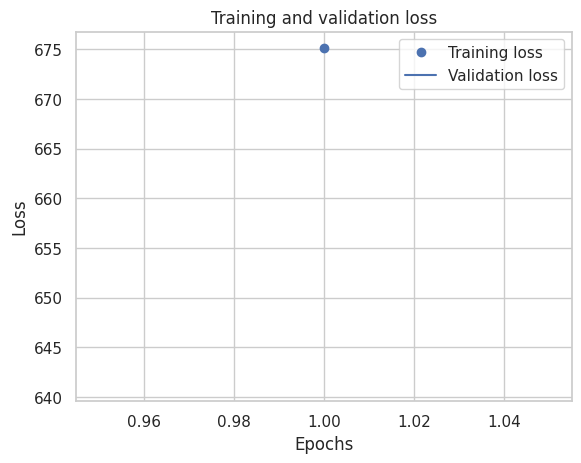

In [ ]:
import matplotlib.pyplot as plt
from keras import layers, models, optimizers

# Define custom metric r2_metric if not already defined
import tensorflow as tf



def r2_metric(y_true, y_pred):
    y_true = tf.cast(y_true, y_pred.dtype)  # Cast y_true to the data type of y_pred
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return (1 - SS_res/(SS_tot + tf.keras.backend.epsilon()))


# Define your model with ReLU activation
model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model with MSE loss and R^2 metric
optimizer = optimizers.Nadam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=optimizer, metrics=[r2_metric])

# Train the model
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_val, y_val))

# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 21ms/step - loss: 0.5140 - r2_metric: 0.9789 - val_loss: 0.5939 - val_r2_metric: 0.9746
Epoch 2502/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.5129 - r2_metric: 0.9794 - val_loss: 0.5939 - val_r2_metric: 0.9746
Epoch 2503/5000
4/4 [==============================] - 0s 25ms/step - loss: 0.5130 - r2_metric: 0.9780 - val_loss: 0.5940 - val_r2_metric: 0.9746
Epoch 2504/5000
4/4 [==============================] - 0s 29ms/step - loss: 0.5129 - r2_metric: 0.9773 - val_loss: 0.5927 - val_r2_metric: 0.9747
Epoch 2505/5000
4/4 [==============================] - 0s 29ms/step - loss: 0.5134 - r2_metric: 0.9760 - val_loss: 0.5952 - val_r2_metric: 0.9746
Epoch 2506/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.5136 - r2_metric: 0.9770 - val_loss: 0.5978 - val_r2_metric: 0.9744
Epoch 2507/5000
4/4 [==============================] - 0s 22ms/step - loss: 0.5134 - r2_m

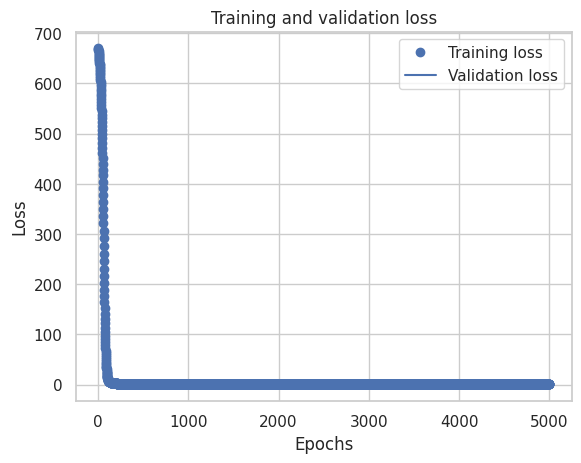

In [ ]:
import matplotlib.pyplot as plt
from keras import layers, models, optimizers

# Define custom metric r2_metric if not already defined
import tensorflow as tf



def r2_metric(y_true, y_pred):
    y_true = tf.cast(y_true, y_pred.dtype)  # Cast y_true to the data type of y_pred
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return (1 - SS_res/(SS_tot + tf.keras.backend.epsilon()))

def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.1)  # You can adjust the value of alpha as needed

# Define your model with ReLU activation
model = models.Sequential([
    layers.Dense(8, activation=leaky_relu, input_shape=(x_train.shape[1],)),
    layers.Dense(4, activation=leaky_relu),
    layers.Dense(1)
])

# Compile the model with MSE loss and R^2 metric
optimizer = optimizers.SGD(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=[r2_metric])

# Train the model
history = model.fit(x_train, y_train, epochs=5000, validation_data=(x_val, y_val))


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
mean = scaler.mean_
std = scaler.scale_
new_data = [1,69,30,24,18,18,2]

standardized_new =  [-6.07230888e-01, -3.83783741e-01,  1.05962437e+00,
         3.96902466e-01,  2.98786467e-01, -4.76583402e-02,
        -1.16026265e+00]

In [ ]:
standardized_new

[-0.607230888,
 -0.383783741,
 1.05962437,
 0.396902466,
 0.298786467,
 -0.0476583402,
 -1.16026265]

In [ ]:
x_val

array([[-1.08721711e+00,  2.48762389e+00, -1.02670033e+00,
        -2.99775277e+00, -3.47859880e+00, -1.31285759e+00,
        -8.42859100e-01],
       [ 2.56744307e-01, -4.44877520e-01,  1.01042752e-01,
         5.75568531e-01,  6.58537445e-01,  3.64718888e-01,
         4.26755113e-01],
       [-1.08721711e+00,  2.36543633e+00, -9.13926017e-01,
        -9.43093021e-01, -3.47859880e+00, -1.46183156e+00,
        -8.42859100e-01],
       [-1.08721711e+00,  1.26574830e+00,  1.01042752e-01,
        -2.99775277e+00, -3.47859880e+00, -1.28479003e+00,
        -2.21827450e+00],
       [-1.08721711e+00,  8.38091845e-01,  4.95752829e-01,
        -3.17761793e-01, -6.09645114e-02, -2.03109442e-01,
        -1.37186502e+00],
       [ 6.40733282e-01, -2.61596183e-01, -4.06441633e-01,
         4.86235499e-01,  2.98786467e-01, -3.13220639e-01,
         9.55761035e-01],
       [-1.75243291e-01,  5.93716728e-01, -3.50054479e-01,
         1.28903369e-01,  1.18910978e-01, -9.13434616e-01,
         4.2675511

In [ ]:
import numpy as np

standardized_new_2d = np.array(standardized_new).reshape(1, -1)

y_pred = RFR.predict(standardized_new_2d)

In [ ]:
y_pred

array([20.38])

In [ ]:
y_val

73     28
18     22
117    25
78     28
76     18
31     22
64     27
140    25
68     18
82     16
109    18
12     16
36     31
9      29
19     28
56     23
136    28
69     29
55     19
131    29
29     30
123    30
26     20
127    32
128    29
144    33
110    26
101    28
45     20
30     29
Name: \tCBR (%), dtype: int64